<a href="https://colab.research.google.com/github/Nazmul92/Machine-Learning-and-Federated-Learning/blob/main/Federated_ANN_vs_Centralized_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Federated ANN iris data classification
### Centralized ANN iris data classification
## Loss comparision among FedANN and Centralized ANN

In [ ]:
!pip install syft==0.2.5 -f https://download.pytorch.org/whl/torch_stable.html

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
import torch

In [4]:
import syft as sy  
hook = sy.TorchHook(torch)  
worker1 = sy.VirtualWorker(hook, id="worker1")  
worker2 = sy.VirtualWorker(hook, id="worker2")  
worker3 = sy.VirtualWorker(hook, id="worker3")
worker4 = sy.VirtualWorker(hook, id="worker4")
worker5 = sy.VirtualWorker(hook, id="worker5")
worker6 = sy.VirtualWorker(hook, id="worker6")
worker7 = sy.VirtualWorker(hook, id="worker7")
worker8 = sy.VirtualWorker(hook, id="worker8")
worker9 = sy.VirtualWorker(hook, id="worker9")
worker10 = sy.VirtualWorker(hook, id="worker10")

In [19]:
dataset=load_iris()

In [20]:
x=dataset.data
y=dataset.target

In [ ]:
x.size

600

In [ ]:
y.size

150

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=7)

In [ ]:
x_train.size


420

In [ ]:
x_test.size


180

In [ ]:
y_train.size


105

In [ ]:
y_test.size

45

In [ ]:
x_test=torch.FloatTensor(x_test)
y_test=torch.FloatTensor(y_test)

In [22]:
base=sy.BaseDataset(torch.from_numpy(x_train),torch.from_numpy(y_train))

In [9]:
class Arguments():
    def __init__(self):
        self.batch_size = 20
        self.test_batch_size = 20
        self.epochs = 1000
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.log_interval = 5
        self.save_model = False

args = Arguments()

use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [10]:
federated_train_loader = sy.FederatedDataLoader(
                         base
                         .federate((worker1,worker2, worker3, worker4, worker5, worker6, worker7, worker8, worker9, worker10)),batch_size=args.batch_size, shuffle=True)

In [ ]:
base_test=sy.BaseDataset(torch.from_numpy(x_test),torch.from_numpy(y_test))

In [ ]:
federated_test_loader = sy.FederatedDataLoader(
                         base_test
                         .federate((worker1,worker2, worker3, worker4, worker5, worker6, worker7, worker8, worker9, worker10)),batch_size=args.batch_size, shuffle=True)

In [ ]:
test_loader=torch.utils.data.DataLoader(base, batch_size=args.test_batch_size)

In [11]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=4, out_features=50)
    self.fc2 = nn.Linear(in_features=50, out_features=100)
    self.output = nn.Linear(in_features=100, out_features=3)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.output(x), dim=1)
    return x

In [ ]:
import numpy as np

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr)
model.train()
#accuracy_list = np.zeros((args.epochs,))
train_loss=[]
test_loss=[]
for epoch in range(1, args.epochs + 1):
  correct=0.0
  for batch_idx, (data, target) in enumerate(federated_train_loader): 
    model.send(data.location) 
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data.float())
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    correct+= (output.argmax(dim=1)==target).sum().get()
    model.get()
  loss=loss.get()
  train_loss.append(loss.item())
  #y_pred=model(x_test).long()
  #t_loss=F.cross_entropy(y_pred,y_test)
  #train_loss.append(t_loss.item())
  print(f'epoch: {epoch:2}  train_loss: {loss.item():10.8f}')
  #accuracy_list[epoch] = correct.mean()
  #print('epoch: {}, train_accuracy: {}'.format(epoch, 100*correct/len(x_train)))

  
   

In [32]:
len(train_loss)

1000

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
  

In [15]:
epochs=1000

In [16]:
import numpy as np

In [ ]:
import numpy as np

In [17]:
x=np.linspace(0,1000,1000)

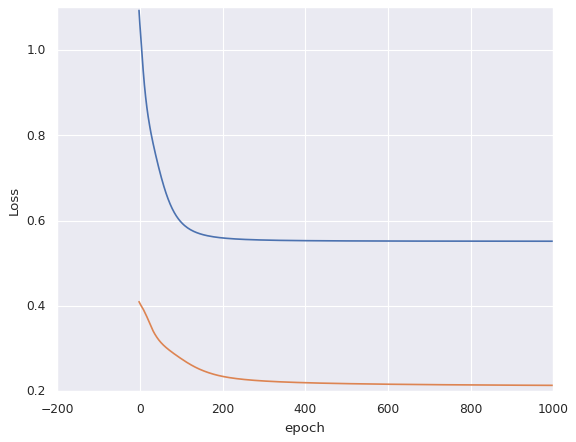

In [48]:
sns.set_theme()
plt.plot(x, train_loss)
plt.style.use('classic')
plt.ylabel('Loss')
plt.xlabel('epoch');


In [ ]:
x=np.linspace(0,1000,1000)

######### Centralized ANN Iris data classification

In [ ]:
base_train=sy.BaseDataset(torch.from_numpy(x_train),torch.from_numpy(y_train))

In [23]:
train_loader=torch.utils.data.DataLoader(base, batch_size=args.batch_size)

In [ ]:
len(train_loader)

6

In [24]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=4, out_features=50)
    self.fc2 = nn.Linear(in_features=50, out_features=100)
    self.output = nn.Linear(in_features=100, out_features=3)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.output(x), dim=1)
    return x

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr)
model.train()
#accuracy_list = np.zeros((args.epochs,))
ann_train_loss=[]
test_loss=[]
for epoch in range(1, args.epochs + 1):
  sum=0.0
  temp=1.0
  test_loss.clear()
  for batch_idx, (data, target) in enumerate(train_loader): 
    #model.send(data.location) 
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data.float())
    loss = F.cross_entropy(output, target)
    test_loss.append(loss.item())
    loss.backward()
    optimizer.step()
  for index, losses in enumerate(test_loss):
    sum+=losses
    temp+=index
  ann_train_loss.append(sum/temp)
    #correct+= (output.argmax(dim=1)==target).sum().get()
    #model.get()
  #loss=loss.get()
  
  #y_pred=model(x_test).long()
  #t_loss=F.cross_entropy(y_pred,y_test)
  #train_loss.append(t_loss.item())
  print(epoch, ann_train_loss )
  #accuracy_list[epoch] = correct.mean()
  #print('epoch: {}, train_accuracy: {}'.format(epoch, 100*correct/len(x_train)))

  
   

In [ ]:
sum = 0.0
for index, losses in enumerate(test_loss):
  sum+=losses
  print(index, losses)
print(sum)

In [26]:
len(test_loss)

6000

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
  

In [ ]:
epochs=1000

In [28]:
import numpy as np

In [50]:
x=np.linspace(0,1000,1000)

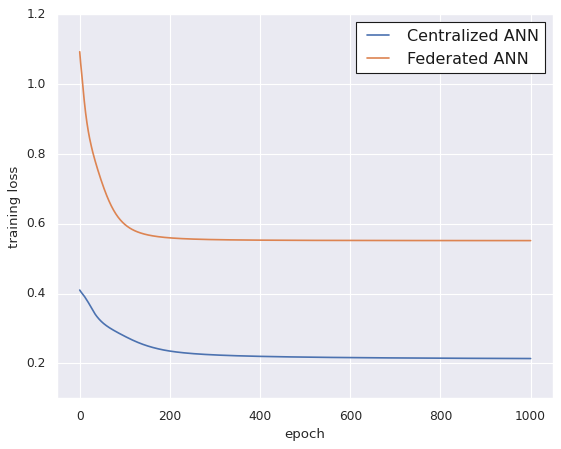

In [61]:
sns.set_theme()
plt.plot(x,ann_train_loss,label="Centralized ANN" )
plt.plot(x, train_loss, label="Federated ANN")
plt.style.use('classic')
plt.ylabel('training loss')
plt.xlabel('epoch');
plt.xlim([-50,1050])
plt.ylim([0.1,1.2])
plt.legend()
plt.savefig('G:\Fedarated Learning\fedANN.pdf')